## import my libraries
- pandas: for data manipulation and read the data 
- matplotlib: for visulisation

In [72]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

## Data Overview:
- Check the size of the dataset (number of rows and columns)
- Look for any missing values in the dataset and some other operation to have a good data for analyse

In [51]:
# read our data with pandas in dataframe to good manipulation
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [52]:
# take an overview on the dataset and see what it have 
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [53]:
# see the columns to understand the metadata of the dataset and take what i need in my analysis
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [54]:
# see the shape of the data set
df.shape

(163003, 17)

In [55]:
# do my dataset have null values? - this line answer this question
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 366
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [56]:
# we note that the most of the record in Base MSRP(price) is 0 and not give the indicated name of it
df[df['Base MSRP'] > 0].shape

(3413, 17)

**as we see that only 3413 record have a price**

## Basic Statistics
- Check for outliers in numeric columns that might need further investigation.
- re-write the dtypes of the columns and some operation to clean my data 

In [57]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,162999.000000,163003.000000,163003.000000,163003.000000,162637.000000,1.630030e+05,1.629990e+05
mean,98170.717422,2020.258449,63.382183,1198.344632,29.226861,2.153918e+08,5.297368e+10
std,2467.998984,3.005057,94.323062,8825.505678,14.841717,7.874180e+07,1.612977e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.762441e+08,5.303301e+10
50%,98122.000000,2021.000000,13.000000,0.000000,33.000000,2.209718e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.000000,42.000000,2.495753e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


**as we see there is *many outliers* in `base MSRP` Manufacturer's Suggested Retail Price so we will drop all record with base MSRP = 0**

In [58]:
# take only the record which have a price 
df = df[df['Base MSRP'] != 0].copy()

In [59]:
# see the statistics for numirc columns 
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,3412.000000,3413.000000,3413.000000,3413.000000,3401.000000,3.413000e+03,3.412000e+03
mean,98128.279308,2015.561969,123.236156,57232.279519,30.338724,2.081607e+08,5.296982e+10
std,2952.291712,2.476510,89.953055,22652.587694,14.571001,9.868898e+07,1.513434e+09
min,8048.000000,2008.000000,12.000000,31950.000000,1.000000,9.658900e+04,6.013313e+09
25%,98045.000000,2013.000000,17.000000,39995.000000,20.000000,1.440754e+08,5.303301e+10
50%,98119.000000,2016.000000,93.000000,59900.000000,34.000000,1.946194e+08,5.303303e+10
75%,98365.250000,2018.000000,208.000000,69900.000000,43.000000,2.477661e+08,5.305307e+10
max,99403.000000,2020.000000,265.000000,845000.000000,49.000000,4.788591e+08,5.307700e+10


#### From up statistics we can conclude:
- `mean` of the price of an electrical car is `57232.279519`
- model year considered that integer type, so we should right it.
- and we extract more information such that the mean of the price.

**we will work on this dataframe**

In [60]:
df.isnull().sum()

VIN (1-10)                                            0
County                                                1
City                                                  1
State                                                 0
Postal Code                                           1
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 12
DOL Vehicle ID                                        0
Vehicle Location                                      2
Electric Utility                                      1
2020 Census Tract                                     1
dtype: int64

In [61]:
df = df.dropna()

In [62]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [63]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
55,2C4RC1N73K,Kitsap,Port Orchard,WA,98367.0,2019,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,39995,26.0,476504941,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
60,KNDJX3AE2G,Snohomish,Snohomish,WA,98296.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,44.0,303656587,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
109,LYVBR0DL2J,Kitsap,Bremerton,WA,98310.0,2018,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,23.0,240710669,POINT (-122.611365 47.575195),PUGET SOUND ENERGY INC,5.303508e+10
158,5YJSA1CN1D,King,Bellevue,WA,98006.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,255856457,POINT (-122.16937 47.571015),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
301,LYVBR0DLXK,King,Kirkland,WA,98034.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,1.0,203022592,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [64]:
# drop unused columns in the analysis
df.drop(['VIN (1-10)', 'Postal Code', 'DOL Vehicle ID', 'Vehicle Location'], axis = 1, inplace = True)

In [65]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
55,Kitsap,Port Orchard,WA,2019,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,39995,26.0,PUGET SOUND ENERGY INC,5.303509e+10
60,Snohomish,Snohomish,WA,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,44.0,PUGET SOUND ENERGY INC,5.306105e+10
109,Kitsap,Bremerton,WA,2018,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,23.0,PUGET SOUND ENERGY INC,5.303508e+10
158,King,Bellevue,WA,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
301,King,Kirkland,WA,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,1.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [66]:
# let's see the datatypes
df.dtypes

County                                                object
City                                                  object
State                                                 object
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
Electric Utility                                      object
2020 Census Tract                                    float64
dtype: object

**we want to change the dtype of `model year`**

In [67]:
df['Model Year'] = df['Model Year'].astype('category')

In [68]:
df['Model Year']

55        2019
60        2016
109       2018
158       2013
301       2019
          ... 
162449    2013
162555    2013
162605    2017
162839    2016
162850    2016
Name: Model Year, Length: 3400, dtype: category
Categories (12, int64): [2008, 2010, 2011, 2012, ..., 2017, 2018, 2019, 2020]

In [69]:
df.dtypes

County                                                 object
City                                                   object
State                                                  object
Model Year                                           category
Make                                                   object
Model                                                  object
Electric Vehicle Type                                  object
Clean Alternative Fuel Vehicle (CAFV) Eligibility      object
Electric Range                                          int64
Base MSRP                                               int64
Legislative District                                  float64
Electric Utility                                       object
2020 Census Tract                                     float64
dtype: object

## Descriptive Statistics:
Use the` describe(`) method to get descriptive statistics for numeric columns like 'Electric Range', 'Base MSRP', and 'Legislative District'. This will give you an overview of the central tendency, dispersion, and other statistics for these columns.

In [70]:
df.describe()

,Electric Range,Base MSRP,Legislative District,2020 Census Tract
count,3400.000000,3400.000000,3400.000000,3.400000e+03
mean,123.232941,57211.567647,30.342059,5.303989e+10
std,89.942497,22645.627616,14.571846,1.586274e+07
min,12.000000,31950.000000,1.000000,5.300396e+10
25%,17.000000,39995.000000,20.000000,5.303301e+10
50%,93.000000,59900.000000,34.000000,5.303303e+10
75%,208.000000,69900.000000,43.000000,5.305307e+10
max,265.000000,845000.000000,49.000000,5.307700e+10


## Categorical Column Analysis:
For categorical columns like 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', and 'Electric Utility', you can use`describe()`) to get a count of unique value and other informations.

In [71]:
df.select_dtypes(exclude=['int64','float64']).describe()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
count,3400,3400,3400,3400,3400,3400,3400,3400,3400
unique,35,228,1,12,11,18,2,2,50
top,King,Seattle,WA,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1769,565,3400,761,1599,1553,2196,2339,1251


## Electric Range and Base MSRP Relationship:
Explore the relationship between 'Electric Range' and 'Base MSRP'. You can use scatter plots, regression analysis, or other visualization techniques
here we use scatter plots.

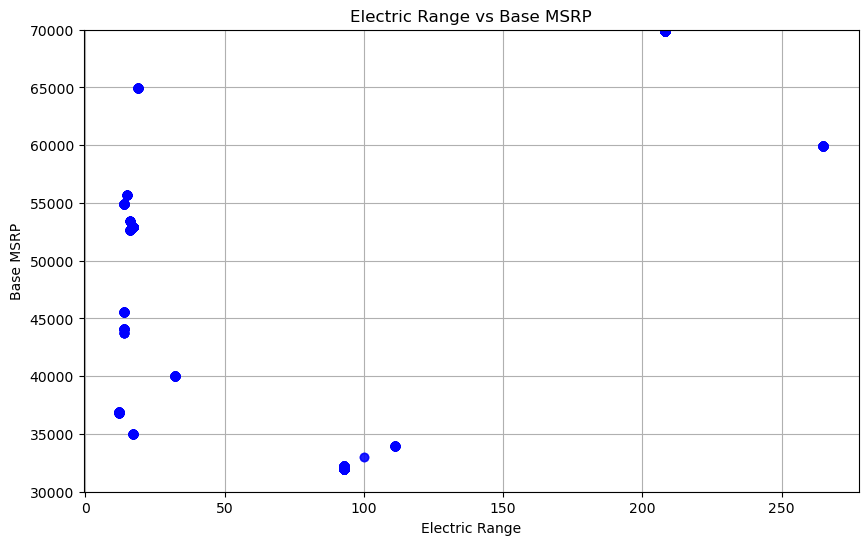

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(df['Electric Range'], df['Base MSRP'], linestyle = '',marker='o', color='blue', alpha=0.5)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.ylim(30000, 70000)
plt.grid(True)
plt.show()


## Geographical Analysis:
Explore the geographical distribution of electric vehicles using 'County,' colum because state is only on category, and city is many categorys.

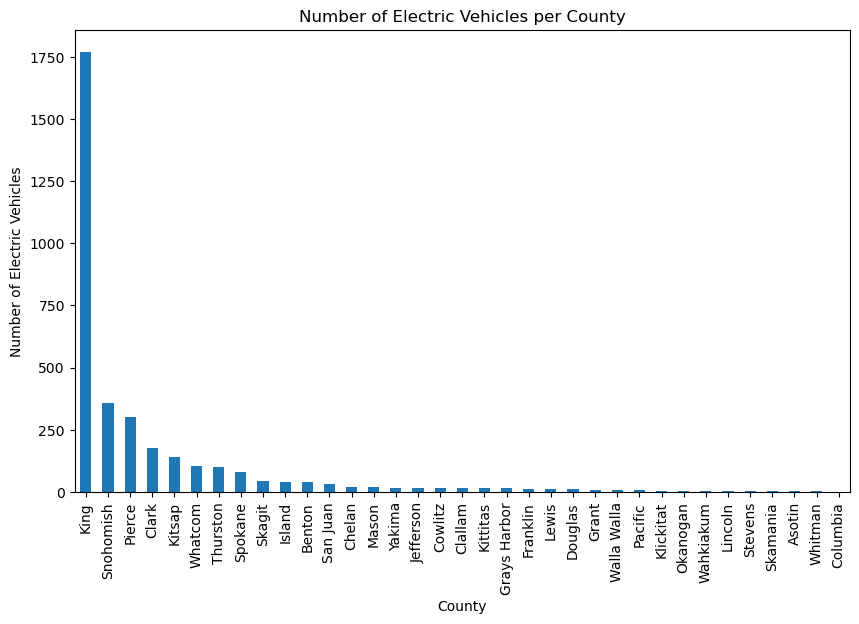

In [81]:
# Example: Number of electric vehicles per state
df['County'].value_counts().plot(kind='bar', figsize=(10, 6), title='Number of Electric Vehicles per County')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.show()


## Time Analysis:weu can perform time-based analysis using the 'Model Year' column.

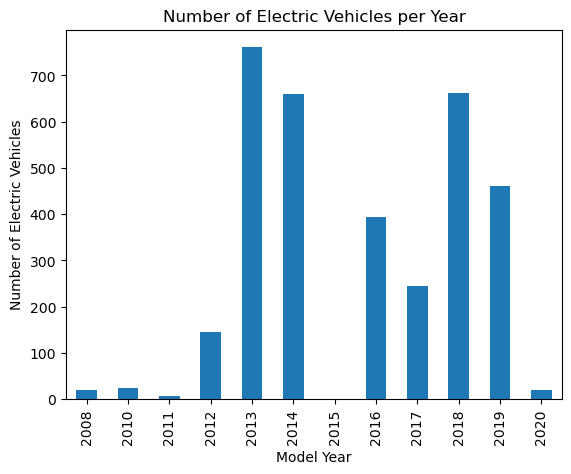

In [83]:
# Example: Number of electric vehicles per year
# Step 1: Convert category to string
df['Model Year'] = df['Model Year'].astype(str)

# Step 2: Convert string to datetime
df['Model Year'] = pd.to_datetime(df['Model Year'], errors='coerce')

df['Model Year'].dt.year.value_counts().sort_index().plot(kind='bar', title='Number of Electric Vehicles per Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.show()


## Box Plot - Electric Range by CAFV Eligibility:
This box plot provides a visual representation of the distribution of electric range for each category of CAFV Eligibility.

C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


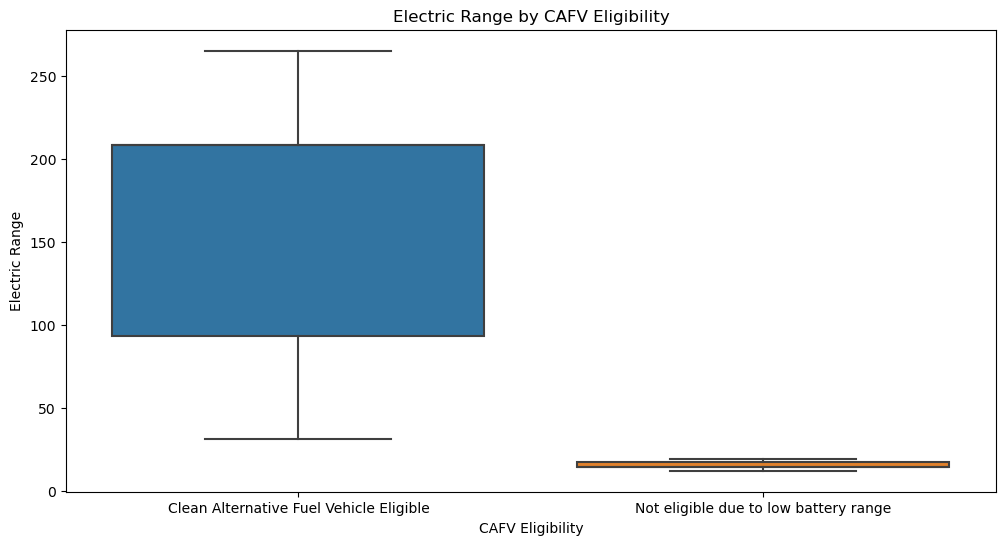

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=df)
plt.title('Electric Range by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range')
plt.show()

## Aggregated Statistics - Mean Electric Range by CAFV Eligibility for Top Five Makes

In [89]:
top_five_makes = df['Make'].value_counts().nlargest(5).index

# Filter DataFrame for the top five makes
df_top_five_makes = df[df['Make'].isin(top_five_makes)]
mean_range_by_cafv_make = df_top_five_makes.groupby(['Make', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Electric Range'].mean().unstack()
mean_range_by_cafv_make

Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Not eligible due to low battery range
Make,,
BMW,NaN,14.530693
KIA,95.110553,NaN
MINI,NaN,12.000000
TESLA,213.472795,NaN
VOLVO,NaN,17.544262


## Proportion of CAFV Eligibility within Each county for Top Five Makes

C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

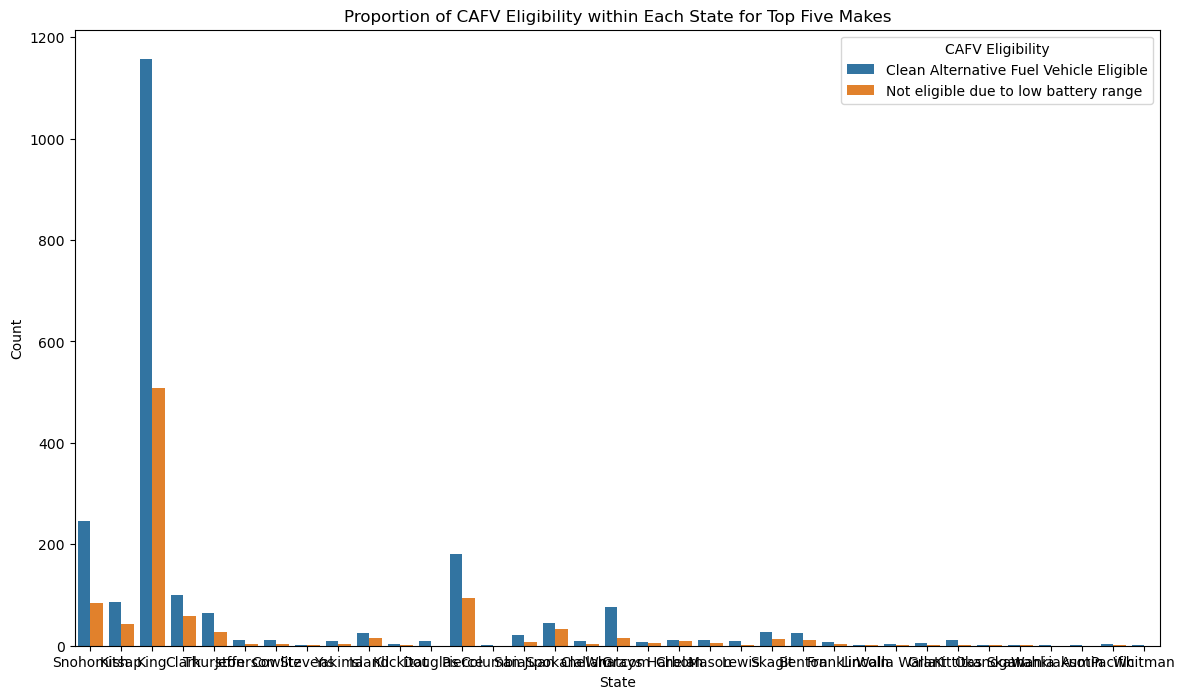

In [91]:
plt.figure(figsize=(14, 8))
sns.countplot(x='County', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=df_top_five_makes)
plt.title('Proportion of CAFV Eligibility within Each county for Top Five Makes')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='CAFV Eligibility')
plt.show()

## Base MSRP by Make (Top Five Makes)
This box plot provides a visual comparison of the distribution of 'Base MSRP' values for the top five car makers. You can observe the median, quartiles, and potential outliers for each make.

C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ELBOSTAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


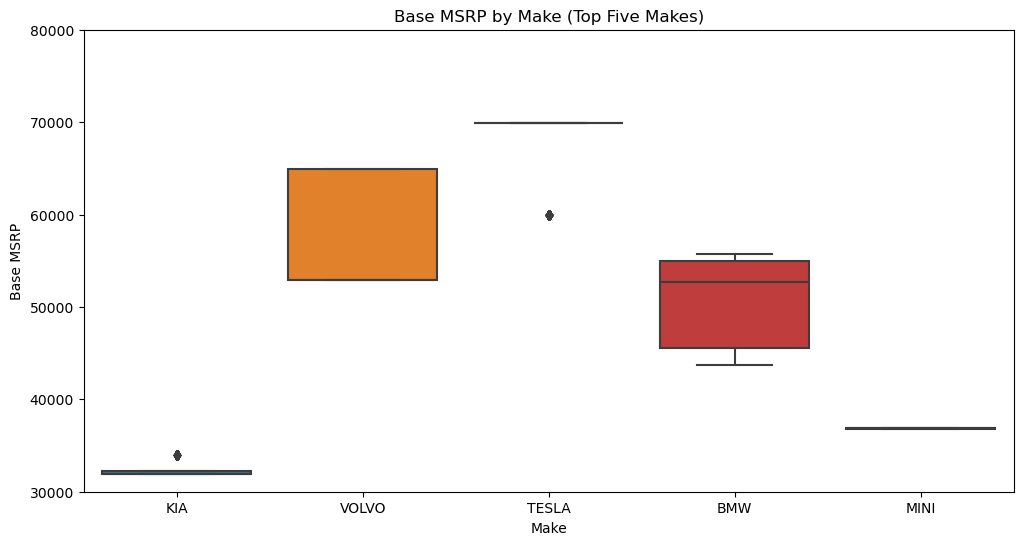

In [93]:
# Top five makes
top_five_makes = df['Make'].value_counts().nlargest(5).index

# Filter DataFrame for the top five makes
df_top_five_makes = df[df['Make'].isin(top_five_makes)]

# Box Plot - Base MSRP by Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Base MSRP', data=df_top_five_makes)
plt.title('Base MSRP by Make (Top Five Makes)')
plt.xlabel('Make')
plt.ylim(30000, 80000)
plt.ylabel('Base MSRP')
plt.show()